In [330]:
import numpy as np
from sklearn import metrics
from sklearn.metrics import precision_recall_fscore_support as prfs
from sklearn.metrics import accuracy_score as acc_score
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn.metrics as metrics
import sklearn.cluster as cluster


In [331]:
import pandas as pd

In [332]:
data = np.load("flows_features_5min.npy")
redteam = np.load("redteam-label.npy")

In [333]:
maxcol = np.max(data,axis=0)

In [334]:
def scale(data):
    d = MinMaxScaler(feature_range=(0,1)).fit_transform(data.astype(float))
    return d
    
d_scaled = scale(data)
redteam = scale(redteam)
redteam

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FC023D7940>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001FC00469240>]], dtype=object)

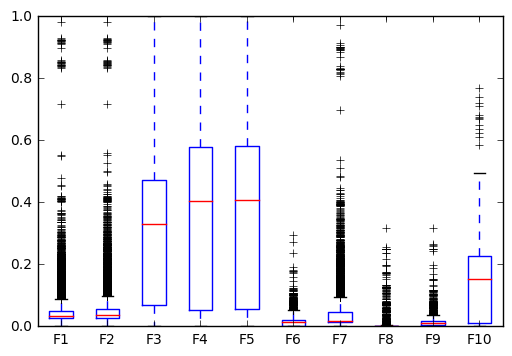

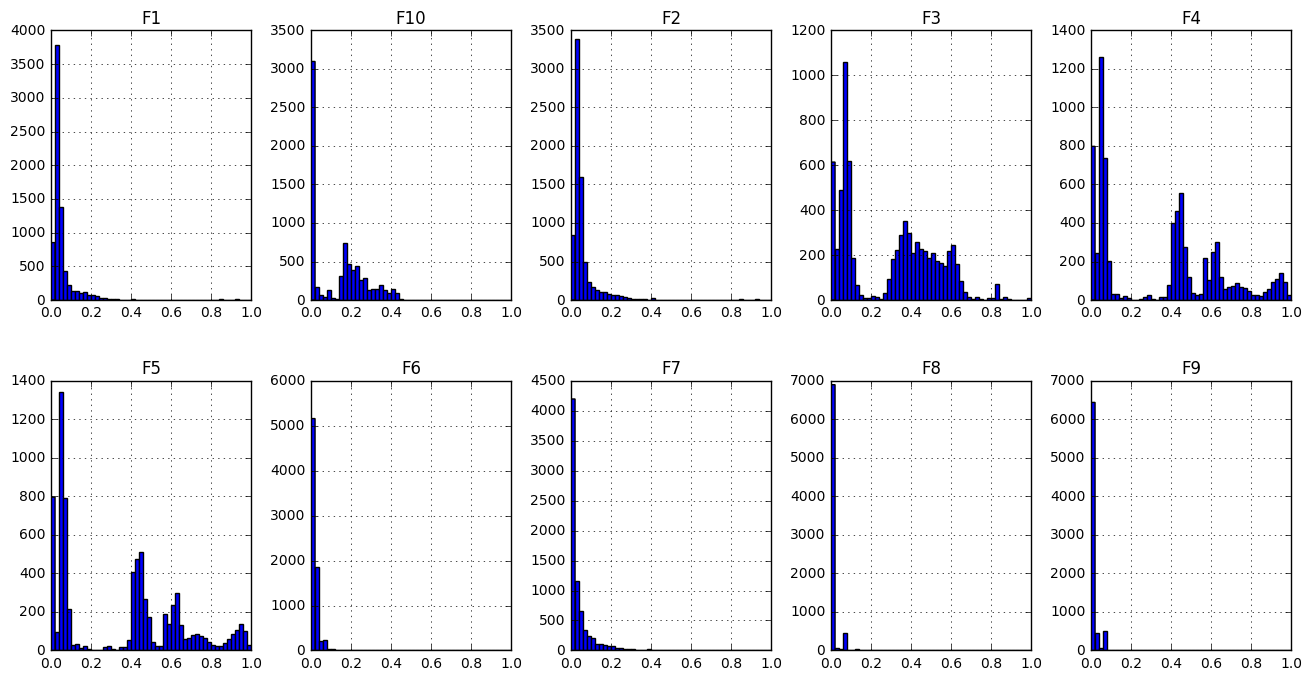

In [335]:
df = pd.DataFrame(data=d_scaled, columns=(['F1','F2','F3','F4','F5','F6','F7','F8','F9','F10']))
df.plot(kind = 'box')
df.hist(figsize=(16,8), layout=(2,5), bins = 50)

In [336]:
def n_cluster_explore(n_clusters, data, redteam):   
    num_of_clusters = n_clusters
    km = cluster.KMeans(n_clusters= num_of_clusters).fit(data)
    label = km.labels_
    print (metrics.confusion_matrix(redteam, label))
    return label, pd.DataFrame(km.cluster_centers_, columns=(['F1','F2','F3','F4','F5','F6','F7','F8','F9','F10']))

In [337]:
l2, df2 = n_cluster_explore(2, d_scaled, redteam)
df2

[[3381 2653]
 [  11 1471]]


,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10
0,0.035214,0.039703,0.068820,0.052051,0.053351,0.002076,0.029237,0.001446,0.003599,0.012866
1,0.069983,0.075573,0.473664,0.586061,0.588117,0.027335,0.062626,0.013538,0.025281,0.239354


In [338]:
p,r,f,_ = prfs(redteam, l2, average='binary', beta=10)
print("Precision: {}".format(p))
print("Recall: {}".format(r))
print("F-measure: {}".format(f))
print("Accuracy: {}".format(acc_score(redteam, l2)))

Precision: 0.3566925315227934
Recall: 0.9925775978407557
F-measure: 0.9753617289461937
Accuracy: 0.6455561468866419


[[3337  699 1998]
 [  11  357 1114]
 [   0    0    0]]


,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10
0,0.035154,0.039664,0.064568,0.049313,0.050613,0.001907,0.029284,0.001419,0.003458,0.011938
1,0.126126,0.136410,0.581364,0.841422,0.843017,0.036615,0.131344,0.018405,0.030966,0.335280
2,0.050505,0.054465,0.435968,0.494804,0.497006,0.024009,0.038785,0.011745,0.023198,0.204599


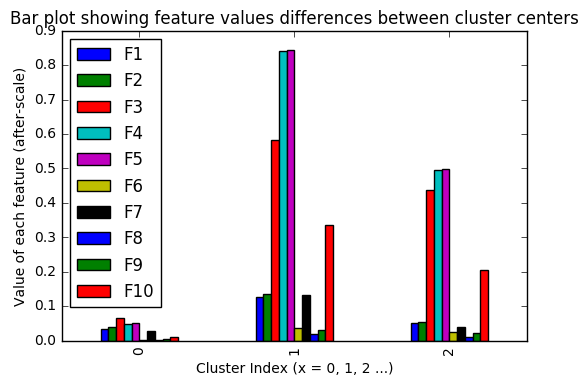

In [339]:
l3, df3 = n_cluster_explore(3, d_scaled, redteam)
df3.plot(kind='bar', legend='best', title="Bar plot showing feature values differences between cluster centers")
plt.xlabel('Cluster Index (x = 0, 1, 2 ...)')
plt.ylabel('Value of each feature (after-scale)')
df3

[[3335 1109  425 1165]
 [  11  909  299  263]
 [   0    0    0    0]
 [   0    0    0    0]]


,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10
0,0.035151,0.039662,0.064412,0.049220,0.050519,0.001876,0.029291,0.001385,0.003423,0.011891
1,0.048231,0.051643,0.415284,0.432779,0.435069,0.022937,0.033387,0.011855,0.022769,0.185651
2,0.149478,0.160724,0.601329,0.898702,0.900101,0.038906,0.155158,0.019448,0.031719,0.356856
3,0.059447,0.065161,0.488725,0.633597,0.635631,0.027336,0.055828,0.012673,0.025282,0.250657


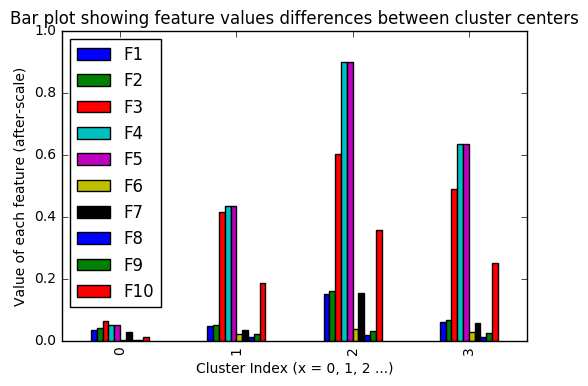

In [343]:
l4, df4 = n_cluster_explore(4, d_scaled, redteam)
df4.plot(kind='bar', legend='best', title="Bar plot showing feature values differences between cluster centers")
plt.xlabel('Cluster Index (x = 0, 1, 2 ...)')
plt.ylabel('Value of each feature (after-scale)')
df4

In [344]:
l4[l4 == 2] = 1
l4[l4 == 3] = 0

In [345]:
p,r,f,_ = prfs(redteam, l4, average='binary', beta=10)
print("Number of anomalies flagged: {}".format(sum(l4 == 1)))
print("Precision: {}".format(p))
print("Recall: {}".format(r))
print("F-measure: {}".format(f))
print("Accuracy: {}".format(acc_score(redteam, l4)))

Number of anomalies flagged: 2742
Precision: 0.44055433989788473
Recall: 0.815114709851552
F-measure: 0.808310476871911
Accuracy: 0.7594465141032464


In [374]:
center0 = df4.iloc[0,:].values
center1 = df4.iloc[1,:].values
center2 = df4.iloc[2,:].values
print ("Baseline Group center:", np.round(center0 * maxcol))
print ("Anomaly Group 1 center values:", np.round(center1 * maxcol))
print ("Anomaly Group 2 center values:", np.round(center2 * maxcol))
print()
print ("Baseline Group Feature 3,4,5,10:", np.round(center0 * maxcol)[[2,3,4,9]])
print ("Group 1 Feature 3,4,5,10:", np.round(center1 * maxcol)[[2,3,4,9]])
print ("Group 2 Feature 3,4,5,10:", np.round(center2 * maxcol)[[2,3,4,9]])
print()
print ("Group 2 Feature 1,2,7:", np.round(center2 * maxcol)[[0,1,6]])

Baseline Group center: [  1.14212650e+09   8.62221000e+05   7.60000000e+01   7.40000000e+01
   7.60000000e+01   2.52000000e+02   6.56815000e+05   9.10000000e+01
   2.24000000e+02   3.19000000e+02]
Anomaly Group 1 center values: [  1.56711846e+09   1.12267100e+06   4.88000000e+02   6.48000000e+02
   6.52000000e+02   3.08400000e+03   7.48660000e+05   7.77000000e+02
   1.49200000e+03   4.97900000e+03]
Anomaly Group 2 center values: [  4.85685599e+09   3.49400700e+06   7.07000000e+02   1.34500000e+03
   1.34900000e+03   5.23200000e+03   3.47919700e+06   1.27500000e+03
   2.07900000e+03   9.57100000e+03]

Baseline Group Feature 3,4,5,10: [  76.   74.   76.  319.]
Group 1 Feature 3,4,5,10: [  488.   648.   652.  4979.]
Group 2 Feature 3,4,5,10: [  707.  1345.  1349.  9571.]

Group 2 Feature 1,2,7: [  4.85685599e+09   3.49400700e+06   3.47919700e+06]


[[ 409 3335 1103 1157   30]
 [ 299   11  904  266    2]
 [   0    0    0    0    0]
 [   0    0    0    0    0]
 [   0    0    0    0    0]]


,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10
0,0.112248,0.123349,0.599511,0.895503,0.896914,0.039233,0.118530,0.019922,0.032384,0.358350
1,0.035151,0.039662,0.064412,0.049220,0.050519,0.001876,0.029291,0.001385,0.003423,0.011891
2,0.047982,0.051393,0.413759,0.432533,0.434821,0.022856,0.033131,0.011758,0.022674,0.185337
3,0.060973,0.066923,0.489785,0.630290,0.632336,0.027267,0.057399,0.012811,0.025208,0.248959
4,0.872045,0.872495,0.608470,0.930356,0.931492,0.032539,0.854361,0.005243,0.022186,0.343592


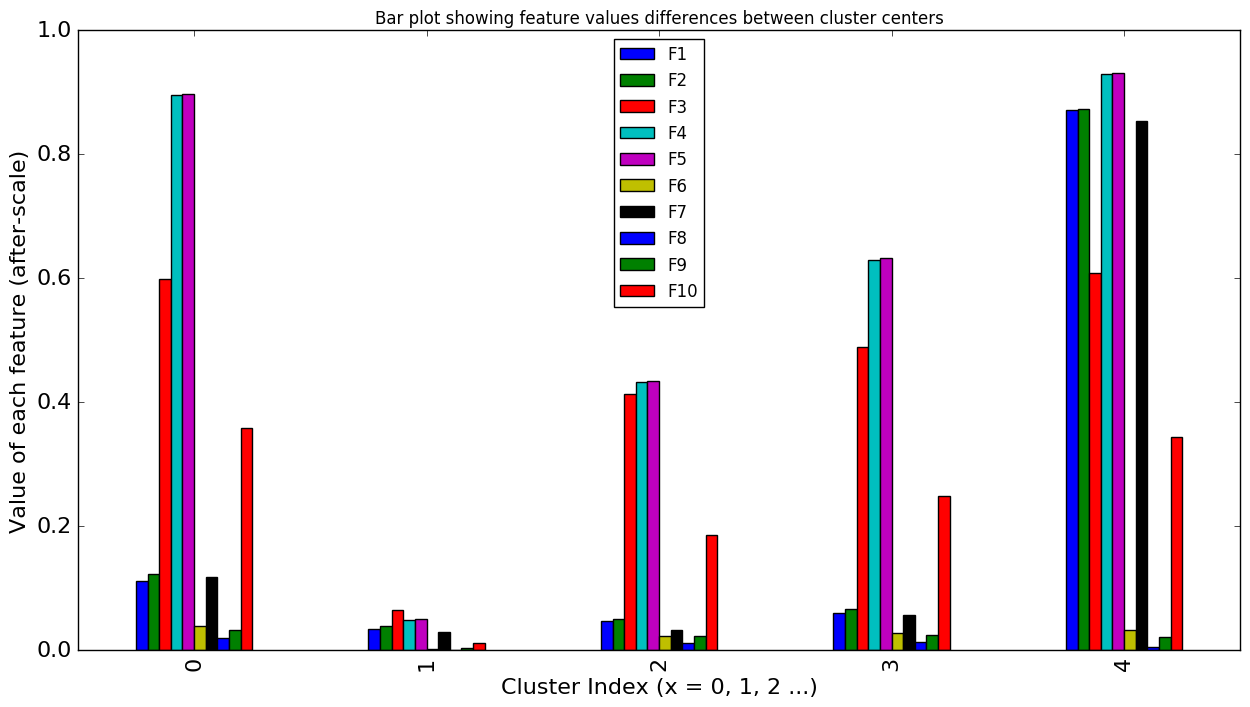

In [350]:
l5, df5 = n_cluster_explore(5, d_scaled, redteam)
df5.plot(kind='bar', legend='best', title="Bar plot showing feature values differences between cluster centers", figsize = (15,8), fontsize = 16)
plt.xlabel('Cluster Index (x = 0, 1, 2 ...)', fontsize = 16)
plt.ylabel('Value of each feature (after-scale)', fontsize = 16)
df5

[[3141 1022  386  883  103  194  275   30]
 [   7  216  285  828   47    4   93    2]
 [   0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0]]


,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10
0,0.023677,0.025820,0.062948,0.048029,0.049344,0.001829,0.015346,0.001361,0.003347,0.011628
1,0.049927,0.054821,0.470269,0.636622,0.638653,0.027300,0.046002,0.012352,0.024563,0.250560
2,0.104928,0.114932,0.604281,0.902442,0.903833,0.039570,0.111148,0.020583,0.032873,0.361796
3,0.045657,0.049041,0.377963,0.430799,0.433016,0.023598,0.030725,0.012657,0.022990,0.189614
4,0.230978,0.254110,0.474151,0.636194,0.638629,0.027190,0.237668,0.010005,0.023609,0.251660
5,0.217576,0.259731,0.087678,0.068145,0.069203,0.002625,0.250999,0.001769,0.004636,0.016073
6,0.047703,0.050803,0.669427,0.469593,0.472026,0.020777,0.033536,0.009981,0.024351,0.176127
7,0.872045,0.872495,0.608470,0.930356,0.931492,0.032539,0.854361,0.005243,0.022186,0.343592


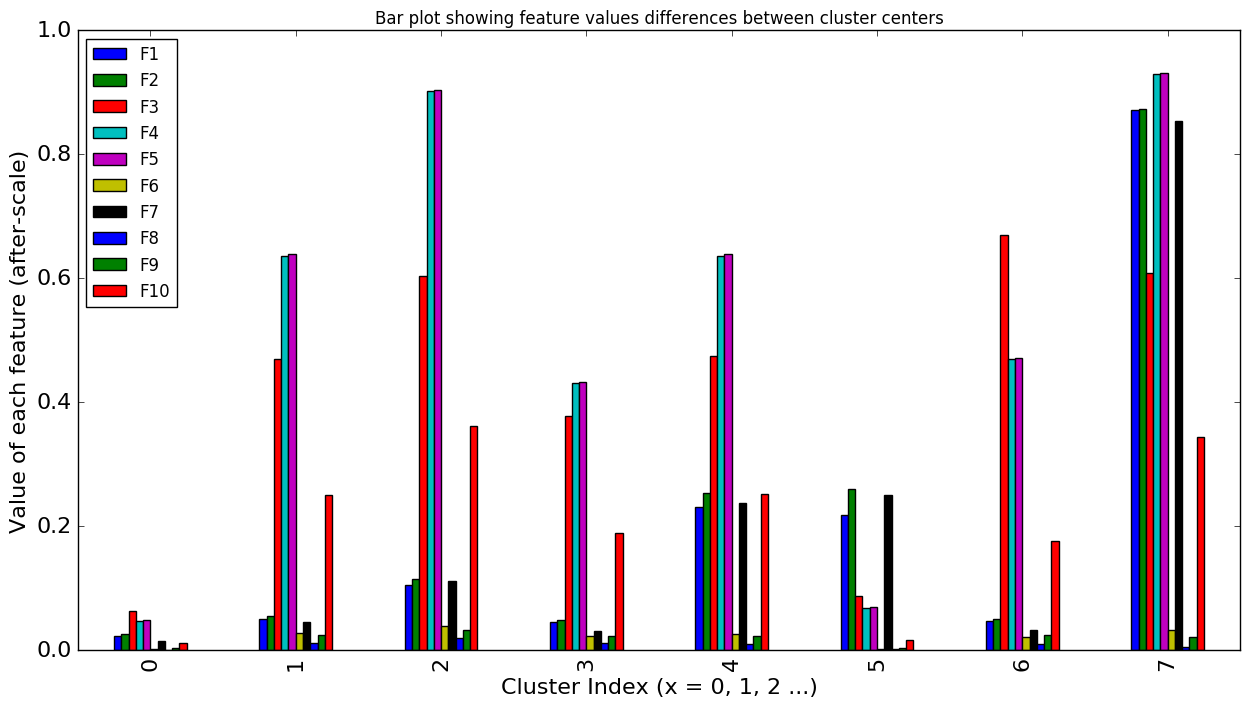

In [352]:
l8, df8 = n_cluster_explore(8, d_scaled, redteam)
df8.plot(kind='bar', legend='best', title="Bar plot showing feature values differences between cluster centers", figsize = (15,8), fontsize = 16)
plt.xlabel('Cluster Index (x = 0, 1, 2 ...)', fontsize = 16)
plt.ylabel('Value of each feature (after-scale)', fontsize = 16)
df8

In [508]:
df_orig = pd.DataFrame(data=data, columns=(['F1','F2','F3','F4','F5','F6','F7','F8','F9','F10']))
newlbl = np.zeros(7516)

for i in range(7516):
    if df_orig.iloc[i,6] >= 3479197*0.90:
        newlbl[i] = 1    
    elif df_orig.iloc[i,9] >= 4979*0.90:
        newlbl[i] = 1

In [509]:
p,r,f,_ = prfs(redteam, newlbl, average='binary', beta=10)
print("Number of anomalies flagged: {}".format(sum(newlbl == 1)))
print("Precision: {}".format(p))
print("Recall: {}".format(r))
print("F-measure: {}".format(f))
print("Accuracy: {}".format(acc_score(redteam, newlbl)))

Number of anomalies flagged: 3676
Precision: 0.36099020674646354
Recall: 0.8954116059379217
F-measure: 0.8824764939819326
Accuracy: 0.6668440659925492


In [510]:
newlbl2 = np.zeros(7516)

for i in range(7516):
    count = 0
    if df_orig.iloc[i,2] >= 488*0.9:
        count+=1
    if df_orig.iloc[i,3] >= 648*0.9:
        count+=1
    if df_orig.iloc[i,4] >= 652*0.9:
        count+=1
    if df_orig.iloc[i,9] >= 4979*0.9:
        count+=1
    if df_orig.iloc[i,6] >= 3479197*0.9:
        count+=1

    if count >= 2:
        newlbl2[i] = 1

In [511]:
p,r,f,_ = prfs(redteam, newlbl2, average='binary', beta=10)
print("Number of anomalies flagged: {}".format(sum(newlbl2 == 1)))
print("Precision: {}".format(p))
print("Recall: {}".format(r))
print("F-measure: {}".format(f))
print("Accuracy: {}".format(acc_score(redteam, newlbl2)))

Number of anomalies flagged: 4067
Precision: 0.3616916646176543
Recall: 0.9925775978407557
F-measure: 0.9757268482336947
Accuracy: 0.6531399680681214
